In [206]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
train_data = pd.read_csv(r'C:\Bharat_Intern\train.csv')
test_data = pd.read_csv(r'C:\Bharat_Intern\test.csv')

In [3]:
data = pd.concat([train_data,test_data])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
print('Shape of the data: ',data.shape)

Shape of the data:  (1309, 12)


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
#Check for null values
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [69]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S


In [70]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0.383838,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,C23 C25 C27,S
414,1306,0.383838,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,0.383838,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,C23 C25 C27,S
416,1308,0.383838,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,C23 C25 C27,S
417,1309,0.383838,3,"Peter, Master. Michael J",male,29.881138,1,1,2668,22.3583,C23 C25 C27,C


<Axes: xlabel='Survived', ylabel='Fare'>

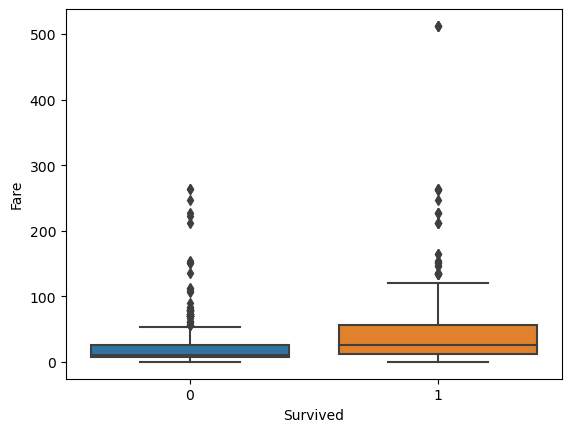

In [71]:
sns.boxplot(x='Survived',y='Fare',data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

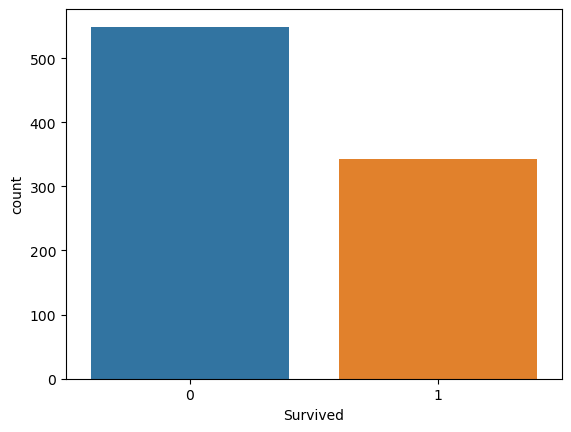

In [72]:
sns.countplot(x='Survived',data=train_data)

<Axes: xlabel='Sex', ylabel='Survived'>

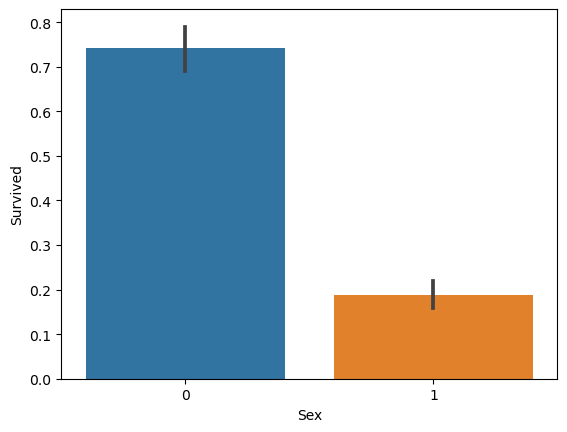

In [73]:
#BarPlot of survival by Sex
sns.barplot(x='Sex',y='Survived',data=train_data)

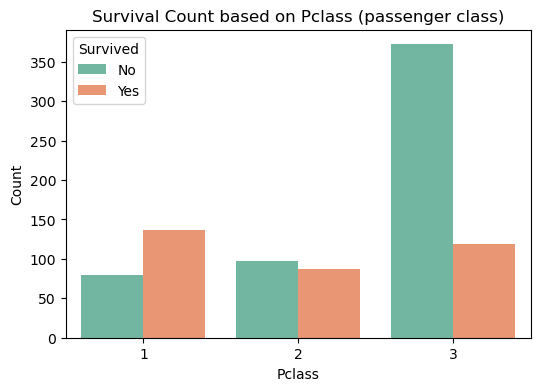

In [74]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass',hue='Survived',data=train_data,palette='Set2')
plt.title('Survival Count based on Pclass (passenger class)')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

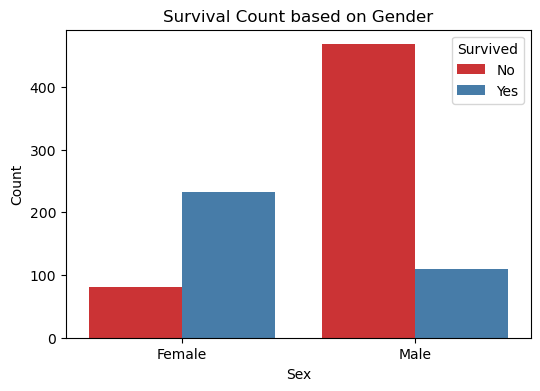

In [75]:
#Visualizing the survival based on Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex',hue='Survived',data=train_data,palette='Set1')
plt.title('Survival Count based on Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived',labels=['No','Yes'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.show()

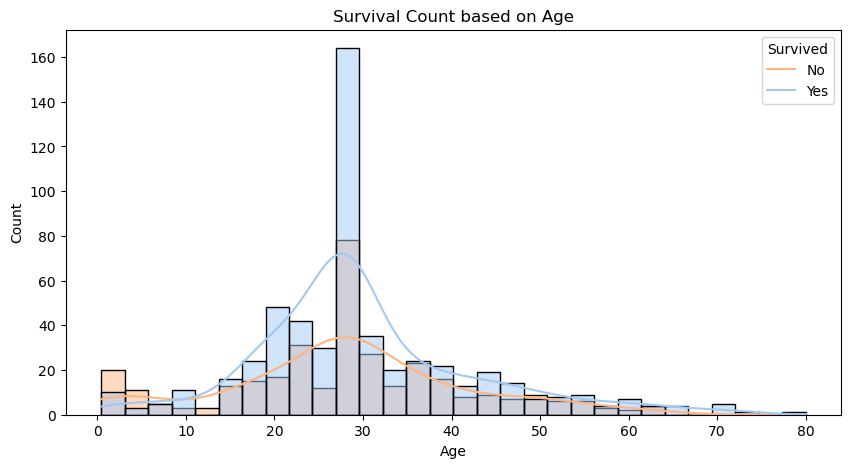

In [76]:
#Visualizing the survival based on Age
plt.figure(figsize=(10,5))
sns.histplot(x='Age',hue='Survived',data=train_data,kde=True,palette='pastel')
plt.title('Survival Count based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

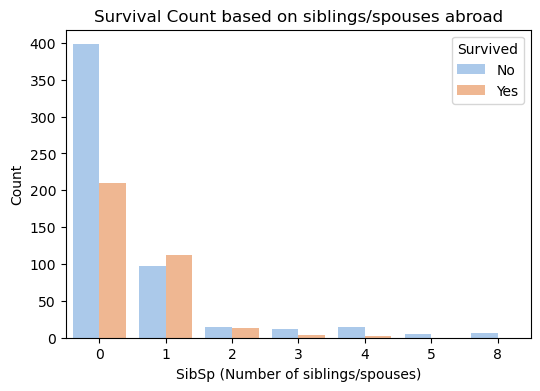

In [77]:
#Visualizing the survival based on siblings/spouses abroad (SibSp)
plt.figure(figsize=(6,4))
sns.countplot(x='SibSp',hue='Survived',data=train_data,palette='pastel')
plt.title('Survival Count based on siblings/spouses abroad')
plt.xlabel('SibSp (Number of siblings/spouses)')
plt.ylabel('Count')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

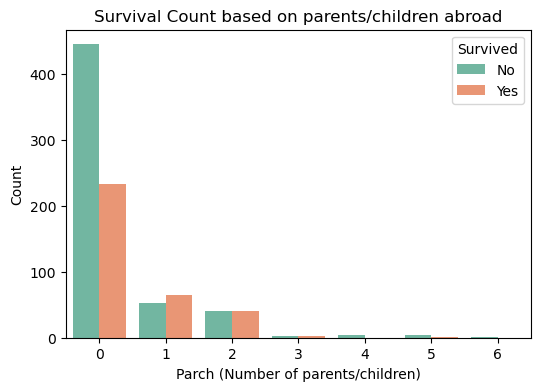

In [78]:
#Visualizing the survival based on parents/children abroad (Parch)
plt.figure(figsize=(6,4))
sns.countplot(x='Parch',hue='Survived',data=train_data,palette='Set2')
plt.title('Survival Count based on parents/children abroad')
plt.xlabel('Parch (Number of parents/children)')
plt.ylabel('Count')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

In [141]:
#Handling missing values
train_data['Age'].fillna(train_data['Age'].median(),inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)
test_data['Age'].fillna(test_data['Age'].median(),inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(),inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0],inplace=True)

In [168]:
#Convert Categorical features to numerical using LabelEncoder
encoder = LabelEncoder()
train_data['Sex'] = encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = encoder.fit_transform(train_data['Embarked'])
test_data['Sex'] = encoder.fit_transform(test_data['Sex'])
test_data['Sex'] = encoder.fit_transform(test_data['Sex'])

In [173]:
#Seperate features and target variable
x=train_data.drop(['Survived','Name','Cabin','Ticket'], axis=1)
y=train_data['Survived']
x
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [174]:
#Split the training data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
x_train
x_valid
y_train
y_valid

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [183]:
#Create the DecisionTreeclassifier model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy score of DecisionTreeClassifier: ',accuracy)

Accuracy score of DecisionTreeClassifier:  0.7653631284916201


In [192]:
#create the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_valid)
accuracy = accuracy_score(y_valid,y_pred)
#Generate Confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
print('Accuracy score of RandomForestClassifier: ',accuracy)
print('Confusion matrix: ')
print(conf_matrix)

Accuracy score of RandomForestClassifier:  0.8212290502793296
Confusion matrix: 
[[92 13]
 [19 55]]


In [194]:
#Create the LogisticRegression model
regressor = LogisticRegression(random_state=42)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy score of LogisticRegression: ',accuracy)

Accuracy score of LogisticRegression:  0.7821229050279329


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [205]:
#Create the LogisticRegression model
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy score of KNeighborsClassifier: ',accuracy)

Accuracy score of KNeighborsClassifier:  0.5865921787709497


In [207]:
#Create the GaussianNB model
gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
y_pred = gaussian.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy score of GaussianNB: ',accuracy)

Accuracy score of GaussianNB:  0.776536312849162
